Jorge Miguel Hernandez Fabra   - 000343587

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importando el archivo scv

In [2]:
world_prices = pd.read_csv('commodity_futures.csv')

todas las casillas con un valor sin definir se remplazara por un cero

In [3]:
prices_filtrado=world_prices.fillna(0)

obteniendo solo los valores de los metales, pues estos son los datos que se van a analizar

In [4]:
prices_metals=prices_filtrado[['Date','COPPER','ALUMINIUM','ZINC','NICKEL','GOLD','SILVER']]

se necesita una lista que contenga los años del 2000 al 2022 en tipo STR

In [5]:
years=[]
for i in range (2000,2023):
    years.append(i)
    years[i-2000]=str(f"{years[i-2000]}")

El nuevo data_frame en donde se almacenara el precio promedio de cada metal durante cada año del 2000 al 2022

In [6]:
df1=pd.DataFrame({
    'YEAR':[],
    'COPPER':[],
    'ALUMINIUM':[],
    'ZINC':[],
    'NICKEL':[],
    'GOLD':[],
    'SILVER':[] })

for i in range (len(years)):
    temp=prices_metals[prices_metals["Date"].str.contains(years[i])]
    df1= df1.append(temp.mean(),ignore_index=True)
    df1['YEAR'].iloc[i]=years[i]
    

C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1= df1.append(temp.mean(),ignore_index=True)
C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append(temp.mean(),ignore_index=True)
C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1= df1.append(temp.mean(),ignore_index=True)
C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: The frame

C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1= df1.append(temp.mean(),ignore_index=True)
C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1= df1.append(temp.mean(),ignore_index=True)
C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['YEAR'].iloc[i]=years[i]
C:\Users\alexf\AppData\Local\Temp\ipykernel_5624\3971235899.py:12: FutureWarning: Dropping o

Se grafica el data_frame anterior y se guarda la figura en formato .png

<function matplotlib.pyplot.show(close=None, block=None)>

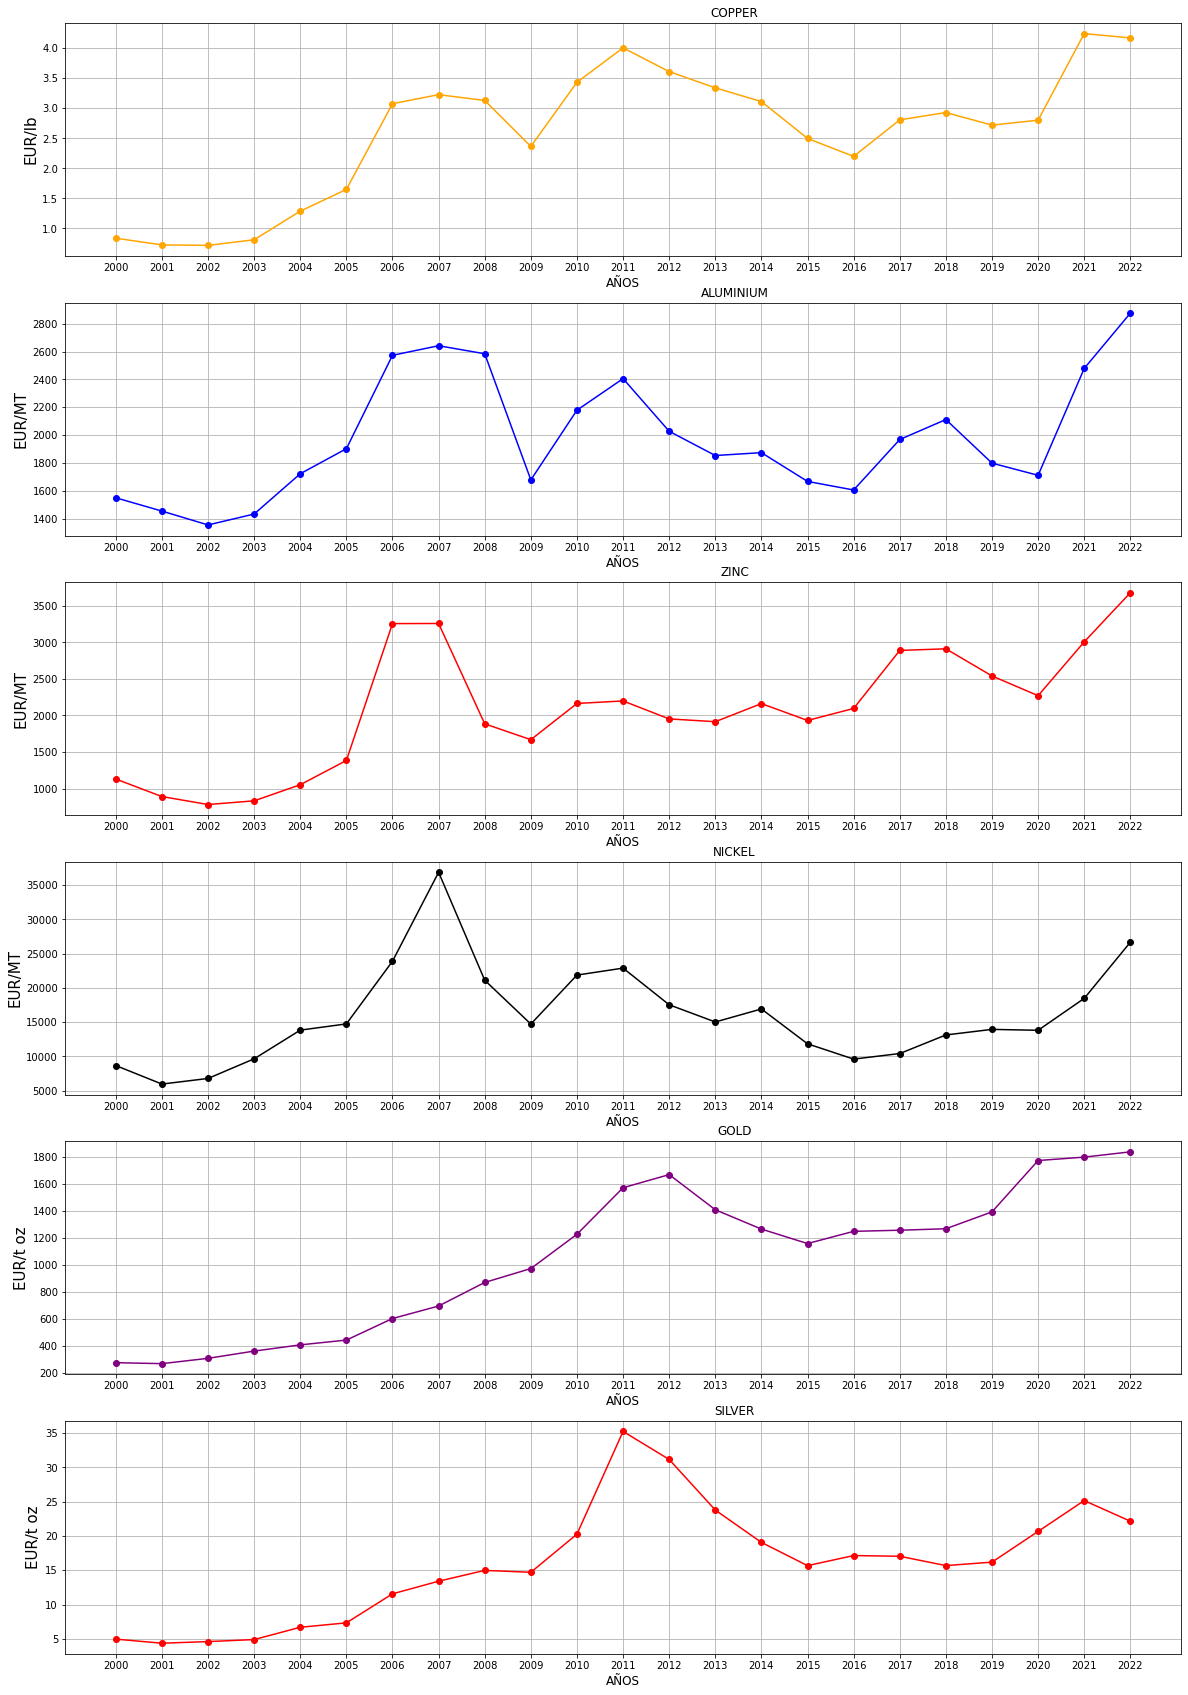

In [7]:
fig, ax=plt.subplots(6,1,figsize=(20,30))

ax[0].plot(df1['YEAR'],df1['COPPER'], marker='o',color='orange')
ax[0].grid()
ax[0].set_title("COPPER",x=0.6,y=1)
ax[0].set_xlabel('AÑOS',fontsize=12)
ax[0].set_ylabel('EUR/lb',fontsize=15)

ax[1].plot(df1['YEAR'],df1['ALUMINIUM'], marker='o',color='blue')
ax[1].grid()
ax[1].set_title("ALUMINIUM",x=0.6,y=1)
ax[1].set_xlabel('AÑOS',fontsize=12)
ax[1].set_ylabel('EUR/MT',fontsize=15)

ax[2].plot(df1['YEAR'],df1['ZINC'], marker='o',color='red')
ax[2].grid()
ax[2].set_title('ZINC',x=0.6,y=1)
ax[2].set_xlabel('AÑOS',fontsize=12)
ax[2].set_ylabel('EUR/MT',fontsize=15)

ax[3].plot(df1['YEAR'],df1['NICKEL'], marker='o',color='black')
ax[3].grid()
ax[3].set_title('NICKEL',x=0.6,y=1)
ax[3].set_xlabel('AÑOS',fontsize=12)
ax[3].set_ylabel('EUR/MT',fontsize=15)

ax[4].plot(df1['YEAR'],df1['GOLD'], marker='o',color='purple')
ax[4].grid()
ax[4].set_title('GOLD',x=0.6,y=1)
ax[4].set_xlabel('AÑOS',fontsize=12)
ax[4].set_ylabel('EUR/t oz',fontsize=15)

ax[5].plot(df1['YEAR'],df1['SILVER'], marker='o',color='red')
ax[5].grid()
ax[5].set_title('SILVER',x=0.6,y=1)
ax[5].set_xlabel('AÑOS',fontsize=12)
ax[5].set_ylabel('EUR/t oz',fontsize=15)

plt.savefig('PruebaObjetiva2.png')
plt.show 

por las datos vistos en la grafica, se genera un interes en el periodo del año 2003 al 2007, asi que se obtiene
el porcentaje promedio en el aumentaron los metales industriales y preciosos

In [8]:
prom_1=int(((df1['COPPER'].iloc[7])/(df1['COPPER'].iloc[3]))*100+((df1['ALUMINIUM'].iloc[7])/(df1['ALUMINIUM'].iloc[3]))*100+((df1['ZINC'].iloc[7])/(df1['ZINC'].iloc[3]))*100+((df1['NICKEL'].iloc[7])/(df1['NICKEL'].iloc[3]))*100)/4
prom_2=int(((df1['GOLD'].iloc[7])/(df1['GOLD'].iloc[3]))*100+((df1['SILVER'].iloc[7])/(df1['SILVER'].iloc[3]))*100)/2

se calcula la desviación estandar y el precio promedio de cada metal del año 2000 al 2022, para saber que tan disperso esta el
valor promedio de cada año respecto al promedio general obtenido de los 23 años

In [9]:
ds_copper=round(np.std(df1['COPPER']),2)
ds_aluminium=round(np.std(df1['ALUMINIUM']),2)
ds_zinc=round(np.std(df1['ZINC']),2)
ds_nickel=round(np.std(df1['NICKEL']),2)
ds_gold=round(np.std(df1['GOLD']),2)
ds_silver=round(np.std(df1['SILVER']),2)

promedios=round(df1[['COPPER','ALUMINIUM','ZINC','NICKEL','GOLD','SILVER']].mean(),2)

pds_copper=round(np.std(df1['COPPER']/(promedios[0]))*100,2)
pds_aluminium=round(np.std(df1['ALUMINIUM']/(promedios[1]))*100,2)
pds_zinc=round(np.std(df1['ZINC']/(promedios[2]))*100,2)
pds_nickel=round(np.std(df1['NICKEL']/(promedios[3]))*100,2)
pds_gold=round(np.std(df1['GOLD']/(promedios[4]))*100,2)
pds_silver=round(np.std(df1['SILVER']/(promedios[5]))*100,2)

ptt=round((pds_copper+pds_aluminium+pds_zinc+pds_nickel+pds_gold+pds_silver)/6,2)

se genera el archivo .txt y se guarda

In [10]:
from datetime import date
from datetime import datetime
time = datetime.now()
time = time.strftime('%d/%m/%Y - %H:%M:%S')

url=str("https://www.kaggle.com/datasets/debashish311601/commodity-prices")

file = open("PruebaObjetiva2.txt",'w')

file.write(f" \n\n\n        Analisis de los precio de metales del año 2000 al 2022")

file.write(f"\n\nEl analisis se hizo con los precios promedios anuales del cobre, aluminio, zin, niquel, oro y plata deñ periodo del 2000 al 2020")
file.write(f"\nlos datos se obtuvierón de {url}")      

file.write(f"\n\n\nPor los precios promedios anuales de los metales obtenidos en las graficas, se nota que el año {df1['YEAR'].iloc[3]} los precios") 
file.write(f"\nempiezan a tener una tendencia al alza hasta el año {df1['YEAR'].iloc[7]}, esto en caso de los metales industrialez, es decir ")
file.write(f"\nel aluminio, zinc, cobre y niquel, tuvieron en promedio un incremento del {prom_1}%, mientras el oro y la plata obtuvieron un ")
file.write(f"\nincrmento del {prom_2}%, estos ultimos dos subieron a tasas menores que el resto y tambien presentan un compartamiento diferente")
file.write(f"\npues son metales preciosos.")

file.write(f"\n\n\nLos precios de los metales se pueden considerar volatiles, su precio puede llegar a cambiar en un {ptt}% de un año a otro\n")

file.write(f"\nmetal      - desviación estandar   -  precio promedio del 2000-2022    -   cambio del precio promedio vs desviación estandar\n")
file.write(f"\nCOPPER     -    {ds_copper} EUR/lb        -        {promedios[0]}EUR/lb                  -                   {pds_copper}%   ")
file.write(f"\nALUMINIUM  -    {ds_aluminium} EUR/MT      -        {promedios[1]}EUR/lb              -                   {pds_aluminium}%   ")
file.write(f"\nZINC       -    {ds_zinc} EUR/MT      -        {promedios[2]}EUR/lb              -                   {pds_zinc}%   ")
file.write(f"\nNICKEL     -    {ds_nickel} EUR/MT      -        {promedios[3]}EUR/lb             -                   {pds_nickel}%   ")
file.write(f"\nGOLD       -    {ds_gold} EUR/t oz    -        {promedios[4]}EUR/lb              -                   {pds_gold}%   ")
file.write(f"\nSILVER     -    {ds_silver} EUR/t oz      -        {promedios[5]}EUR/lb                -                   {pds_silver}%   ")

file.write(f"\n\nSiguiendo la tendencia con los datos obtenidos el precio del cobre puede de un año a otro tener un cambio del ±{pds_copper}% ")
file.write(f"\nel aluminio un cambio de un año a otro en su precio del  ±{pds_aluminium}%")
file.write(f"\nel zinc un cambio de un año a otro en su precio del  ±{pds_zinc}%")
file.write(f"\nel niquel un cambio de un año a otro en su precio del   ±{pds_nickel}%")
file.write(f"\nel oro un cambio de un año a otro en su precio del   ±{pds_gold}%")
file.write(f"\nla plata un cambio de un año a otro en su precio del   ±{pds_silver}%")

file.write(f"\n\nel precio del oro se ve afectado en menor proporción que el resto de metales, siguiendo la plata el mismo comportamiento,")
file.write(f"\nel precio de la plata tiene una correlación directa (positiva) con el precio del oro. Es decir, si conocemos ")
file.write(f"\nel comportamiento del precio del oro, podremos conocer, en general, el comportamiento del precio de la plata, o ")
file.write(f"\nviceversa. Esto nos muestra que estos dos metales tienen comportamientos y reacciones similares en el mercado, almenos")
file.write(f"\nesto se puede deducir del comportamiento de estos metales en estas dos ultimas decadas.")


file.write(f"\n\nJorge Miguel Hernandez Fabra  - {time}")
file.close()